# Minor Project

# Problem statement:

### Create a classification model to predict the gender (male or female) based on different acoustic parameters

Context: This database was created to identify a voice as male or female, based upon
acoustic properties of the voice and speech. The dataset consists of 3,168 recorded
voice samples, collected from male and female speakers. The voice samples are preprocessed
by acoustic analysis in R using the seewave and tuneR packages, with an
analyzed frequency range of 0hz-280hz (human vocal range).
Column Description:
• meanfreq: mean frequency (in kHz)
• sd: standard deviation of frequency
• median: median frequency (in kHz)
• Q25: first quantile (in kHz)
• Q75: third quantile (in kHz)
• IQR: interquantile range (in kHz)
• skew: skewness (see note in specprop description)
• kurt: kurtosis (see note in specprop description)
• sp.ent: spectral entropy
• sfm: spectral flatness
• mode: mode frequency
• centroid: frequency centroid (see specprop)
• peakf: peak frequency (frequency with highest energy)
• meanfun: average of fundamental frequency measured across acoustic signal
• minfun: minimum fundamental frequency measured across acoustic signal
• maxfun: maximum fundamental frequency measured across acoustic signal
• meandom: average of dominant frequency measured across acoustic signal
• mindom: minimum of dominant frequency measured across acoustic signal
• maxdom: maximum of dominant frequency measured across acoustic signal
• dfrange: range of dominant frequency measured across acoustic signal
• modindx: modulation index. Calculated as the accumulated absolute difference
between adjacent measurements of fundamental frequencies divided by the
frequency range
• label: male or female
Dataset:
https://drive.google.com/file/d/1kFUxeWX1yTX1uxrpKrtqOCG2vyQlsVCM/view?usp=sharing
Steps to consider:
1)Remove/handle null values (if any)
2)Depict percentage distribution of label on a pie chart
3)Considering all the features as independent feature and label as dependent feature,
split the dataset training and testing data with test size=20%
4)Apply the following classifier models on training dataset and generate predictions for
the test dataset
a. Decision Tree Classifier
b. Random Forest Classifier
c. KNN Classifier
d. Logistic Regression
e. SVM Classifier
5)Also generate confusion_matrix and classification report for each model generated in
Q4.
6)Report the model with the best accuracy.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

### Importing the data 

In [2]:
voice_df = pd.read_csv("voice.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Shape of the data

In [3]:
voice_df.shape

(3168, 21)

### Checking for Null Values

In [4]:
voice_df.isna().sum()        

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### PIE CHART OF PERCENTAGE DISTRIBUTION

In [5]:
voice_df['label'].value_counts() 

male      1584
female    1584
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x25b207700d0>,
 [Text(6.735557395310444e-17, 1.1, 'male'),
  Text(-2.0206672185931328e-16, -1.1, 'female')])

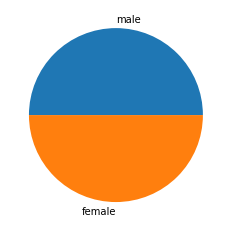

In [6]:
# We can observe that 50% of the values belong to male and the remaining to female
lab=['male', 'female']
c=[1584, 1584]
plt.pie(c, labels=lab)

In [7]:
x=voice_df.iloc[:, :-1]
y=voice_df.iloc[:,-1]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


## DECISION TREE CLASSIFIER

In [8]:
print(x_train.shape)

(2534, 20)


### DEFINING FEW FUNCTIONS

In [9]:
def gen_cls_metrics(ytest, ypred):
    print("Accuracy: ", accuracy_score(ytest, ypred))
    cm3=confusion_matrix(ytest, ypred)
    print(cm3)
    print(classification_report(ytest, ypred))
def train_test_score(model):
    print("Training: ", model.score(x_train, y_train))
    print("Test: ", model.score(x_test, y_test))

### Prediction

In [10]:
m3=DecisionTreeClassifier(criterion='gini', max_depth=10)
m3.fit(x_train, y_train)
train_test_score(m3)

Training:  0.9952644041041832
Test:  0.973186119873817


In [11]:
ypred_m3=m3.predict(x_test)
print(ypred_m3)

['male' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'


In [12]:
print("Decision Tree Classification Metrics:")
gen_cls_metrics(y_test, ypred_m3)

Decision Tree Classification Metrics:
Accuracy:  0.973186119873817
[[317   7]
 [ 10 300]]
              precision    recall  f1-score   support

      female       0.97      0.98      0.97       324
        male       0.98      0.97      0.97       310

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



The accuracy of the Decision Tree classifier is 97.31%

## RANDOM FOREST CLASSIFIER 

In [13]:
m4=RandomForestClassifier(n_estimators=70, criterion='gini', max_depth=10)
m4.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=70)

In [14]:
ypred_m4=m4.predict(x_test)
print(ypred_m4)

['male' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'


In [15]:
print("Metrics for Random Forest CLassifier")
gen_cls_metrics(y_test, ypred_m4)

Metrics for Random Forest CLassifier
Accuracy:  0.9747634069400631
[[317   7]
 [  9 301]]
              precision    recall  f1-score   support

      female       0.97      0.98      0.98       324
        male       0.98      0.97      0.97       310

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



The accuracy of the Random Forest Classifier is 97.47%

## KNN CLASSIFIER

In [16]:
m2=KNeighborsClassifier(n_neighbors=50)
m2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [17]:
print("Training: ", m2.score(x_train, y_train))
print("Testing: ", m2.score(x_test, y_test))

Training:  0.7063930544593529
Testing:  0.6656151419558359


In [18]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

['female' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'femal

In [19]:
#knn
gen_cls_metrics(y_test, ypred_m2)

Accuracy:  0.6656151419558359
[[212 112]
 [100 210]]
              precision    recall  f1-score   support

      female       0.68      0.65      0.67       324
        male       0.65      0.68      0.66       310

    accuracy                           0.67       634
   macro avg       0.67      0.67      0.67       634
weighted avg       0.67      0.67      0.67       634



The accuracy  of the KNN classifier is 66.56%

## LOGISTIC REGRESSION

In [20]:
m1=LogisticRegression()
m1.fit(x_train, y_train)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print("Train:", m1.score(x_test, y_test))
print("Test: ", m1.score(x_train, y_train))

Train: 0.8927444794952681
Test:  0.9064719810576164


In [22]:
#prediction of values
ypred_m1=m1.predict(x_test)
print(ypred_m1)

['male' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'ma

In [24]:
print("Metrics for Logistic Regression CLassifier")
gen_cls_metrics(y_test, ypred_m1)

Metrics for Logistic Regression CLassifier
Accuracy:  0.8927444794952681
[[264  60]
 [  8 302]]
              precision    recall  f1-score   support

      female       0.97      0.81      0.89       324
        male       0.83      0.97      0.90       310

    accuracy                           0.89       634
   macro avg       0.90      0.89      0.89       634
weighted avg       0.90      0.89      0.89       634



The accuracy of the Logistic Regression Classifier is 89.27%

## SVM CLASSIFIER 

In [25]:
m5=SVC(kernel='linear', C=0.1)
m5.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [26]:
train_test_score(m5)

Training:  0.829518547750592
Test:  0.8170347003154574


In [27]:
ypred_m5=m5.predict(x_test)
print(ypred_m5)

['male' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 '

In [28]:
print("Metrics for SVM CLassifier")
gen_cls_metrics(y_test, ypred_m5)

Metrics for SVM CLassifier
Accuracy:  0.8170347003154574
[[230  94]
 [ 22 288]]
              precision    recall  f1-score   support

      female       0.91      0.71      0.80       324
        male       0.75      0.93      0.83       310

    accuracy                           0.82       634
   macro avg       0.83      0.82      0.82       634
weighted avg       0.84      0.82      0.82       634



The accuracy of the SVM classifier is 81.7%

# REPORT

We can observe that the Random Forest classifier is the most accurate classification model amongst the above classifier models.

Author: Devashish Mudigonda